Análise Inicial dos Dados

In [0]:
import pandas as pd

In [0]:
pip install openpyxl

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
df = pd.read_excel("/Workspace/Users/vinicius.soares@aperam.com/Central_Nut/base_dados (1).xlsx", sheet_name="Sheet1")
df.to_csv("/Workspace/Users/vinicius.soares@aperam.com/Central_Nut/base_dados.csv", sep=",")

In [0]:
df = pd.read_csv("/Workspace/Users/vinicius.soares@aperam.com/Central_Nut/base_dados.csv", sep=",")

In [0]:
df.shape

(2109, 7)

In [0]:
df = df.drop(columns=["Unnamed: 0"])

In [0]:
df.describe()

,QUANTIDADE,FATURAMENTO
count,2109.000000,2109.000000
mean,203.168326,22153.466027
std,383.874194,43870.813728
min,1.000000,0.020000
25%,37.000000,2814.710000
50%,90.000000,8283.720000
75%,196.000000,21077.540000
max,3690.000000,411291.550000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REFERENCIA   2109 non-null   object 
 1   EMPRESA      2109 non-null   object 
 2   FAMILIA      2109 non-null   object 
 3   SKU          2109 non-null   object 
 4   QUANTIDADE   2109 non-null   int64  
 5   FATURAMENTO  2109 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 99.0+ KB


In [0]:
df['EMPRESA'].unique()

array(['B-Sales', 'MedClin', 'NutriMax'], dtype=object)

In [0]:
df['FAMILIA'].unique()

array(['Oleo Natural', 'LifeFit', 'Triplo Mix', 'Climax', 'Complex',
       'CalMin', 'CoEnz', 'CoReboost', 'Magnesium', 'FlexMore', 'MindFit',
       'Omega Plus', 'Regenix', 'PureFlex', 'Intestine', 'J-Cold',
       'Oleo Herbal', 'Vita D', 'CreatFit', 'EnerMax', 'Maximum', 'Vigor',
       'PalaFit', 'BioRib', 'ExtraCreatine', 'CicloFit', 'Óleo Plus',
       'HairFit', 'Super D', 'PolyOmega', 'Activa', 'BladeFlex',
       'ExtraPure', 'Óleo Azul ', 'Óleo Vita', 'Óleo Essencial',
       'BioActive', 'Levensa', 'BioSleep', 'Super S', 'YoungPlus',
       'BomSono'], dtype=object)

In [0]:
df['SKU'].unique()

array(['Oleo Natural - Pote Com 120 Softcaps',
       'LifeFit Limão 10g C/ 30 Saches',
       'LifeFit Tangerina 10g C/ 30 Saches', 'Triplo Mix - 60 Cápsulas',
       'Climax - Pote Com 60 Capsulas', 'Complex 120 Caps',
       'CalMin –  Nova Fórmula', 'CoEnz - 200mg - 60 Caps',
       'CoReboost 90 Caps', 'Magnesium - Pote 60 Cápsulas',
       'FlexMore - 90 Cápsulas 90 Cápsulas', 'MindFit - 90 Caps',
       'Omega Plus - 180 caps', 'Regenix - 15ml', 'PureFlex - 60 Caps',
       'Intestine - Limão Com 30 Sachês',
       'Intestine - Tangerina Com 30 Sachês',
       'J-Cold - Tagenrina - Lata 300 Gramas ',
       'Oleo Herbal - 90 softcaps', 'Vita D - 120 cápsulas',
       'CreatFit - Lata 100g', 'CreatFit - Lata 300g', 'EnerMax Limao',
       'EnerMax Tanagerina', 'Maximum - 300 g 300 g',
       'Vigor - Woman 150g', 'Omega Plus - 30 caps',
       'LifeFit Tangeriana 20 G', 'CreatFit -creapure® 300g',
       'PalaFit - 300 g ', 'BioRib - 150 g', 'Climax  Tangerina 7g',
       'ExtraC

Valores Nulos

In [0]:
#Encontrando os valores nulos e somando para cada feature a quantidade de valores ausentes
valores_ausentes = df.isnull().sum()
print(valores_ausentes)

REFERENCIA     0
EMPRESA        0
FAMILIA        0
SKU            0
QUANTIDADE     0
FATURAMENTO    0
dtype: int64


In [0]:
dist = df.quantile([0.25, 0.75])
# o que representa o quantile?
# 25% dos valores da coluna Qutidade estão baixo de 37
# 75% dos valores da coluna Quantidade estão acima de 196
# 50% dos valores da coluna quantidade estão entre 37 e 196

# 25% dos valores da coluna Faturamento estão baixo de 2814
# 75 % dos valores da coluna Faturamento estão acima de 21077.5
# 50% dos valores da coluna Faturamento estão entre 2814 e 21077.5
dist

/home/spark-f9080b0f-e328-4822-8963-16/.ipykernel/1667/command-5384764418685892-1690843205:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dist = df.quantile([0.25, 0.75])


,QUANTIDADE,FATURAMENTO
0.25,37.0,2814.71
0.75,196.0,21077.54


In [0]:
# Analisdando o IQR para cada cluna:

# Para QUANTIDADE:
#Q1 = 37.0
#Q3 = 196.0
#IQR = 196.0 - 37.0 = 159.0

#Outlier superior: Q3 + 1.5 * IQR = 196 + 1.5 * 159 = 289.5
#Outleri inferior: Q1 - 1.5 * IQR = 37 - 1.5 * 159 = -110.5

# Para Faturamento:
#Para FATURAMENTO:

#Q1 = 2814.7
#Q3 = 21077.5
#IQR = 21077.5 - 2814.7 = 18262.8

#Outlier superior: Q3 + 1.5 * IQR = 21077.5 + 1.5 * 18262.8 = 39806.7
#Outler inferior: Q1 - 1.5 * IQR = 2814.7 - 1.5 * 18262.8 = -17440.1

#Levando em consideração estatisticamente, Quantidade e Faturamento não podem ser negativos e não possuem limite superior.

In [0]:
#Os outliers são possíveis de calcular através dos intervalos interquartis e também pelo Z-score(dados físicos, medidas e distribuições normais)
# z = (x - mean) / std 

In [0]:
import matplotlib.pyplot as pltb

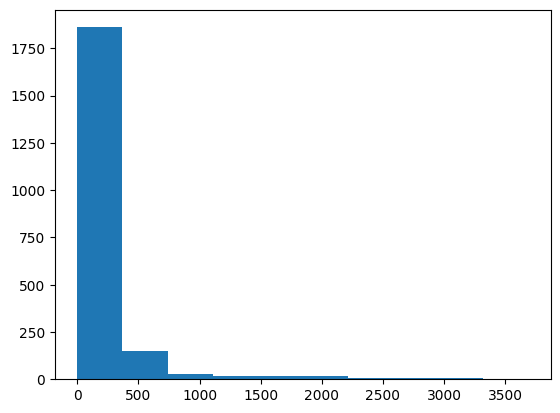

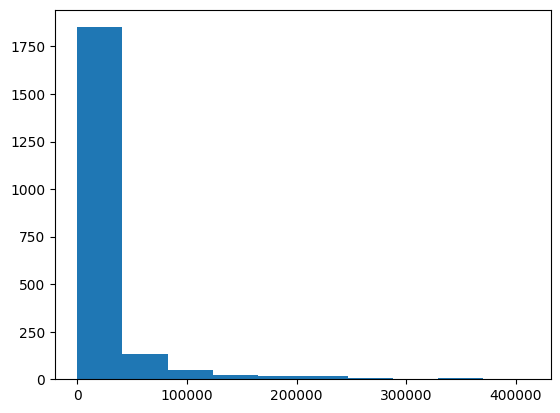

In [0]:
#Calda longa e assimétrica, melhor utilização seria IQR
import matplotlib.pyplot as pltb
pltb.hist(df['QUANTIDADE'], bins=10)
pltb.show()

pltb.hist(df['FATURAMENTO'], bins=10)
pltb.show()

In [0]:
#CALCULANDO VIA IQR
#Os intervalor interquartis são os valores que estão entre os 25% e 75% percentis, que são utilizados para calcular o IQR que é utilizado para calcular os outliers.
# 25% = Q1−1.5×IQR
# 75% = Q3+1.5×IQR

def identificar_outliers(df):
    for coluna in df[['QUANTIDADE', 'FATURAMENTO']]:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1

        baixo = len(df[df[coluna] < (Q1 - 1.5 * IQR)])
        acima = len(df[df[coluna] > (Q3 + 1.5 * IQR)])

        print(f'\n{coluna}:')
        print(f'Outliers inferiores: {baixo}')
        print(f'Outliers superiores: {acima}')

identificar_outliers(df)




QUANTIDADE:
Outliers inferiores: 0
Outliers superiores: 200

FATURAMENTO:
Outliers inferiores: 0
Outliers superiores: 203


In [0]:
# O tratamento de outliers para VENDAS e QUANTIDADE devem ser tratados de maneira cautelosa
# Valores altos podem ser demandas de época (Natal, Black Friday) ou até mesmo pedidos realmente feitos por clientes
# Valores baixos pode ser liquidações, promoções, uma primeira compra de algum clientes...

**EDA**

In [0]:
import seaborn as sns

<Axes: xlabel='QUANTIDADE'>

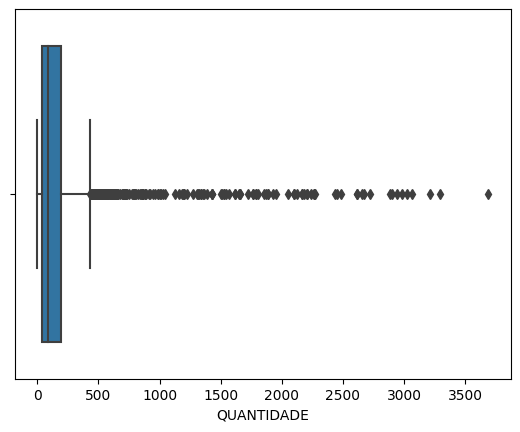

In [0]:
#Outliers positivos
sns.boxplot(x=df['QUANTIDADE'])

<Axes: xlabel='FATURAMENTO'>

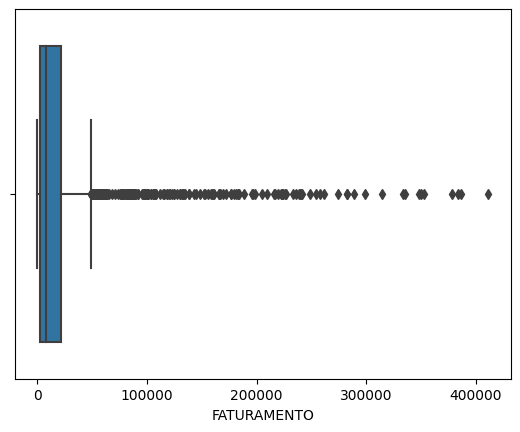

In [0]:
#Outliers positivos
sns.boxplot(x=df['FATURAMENTO'])

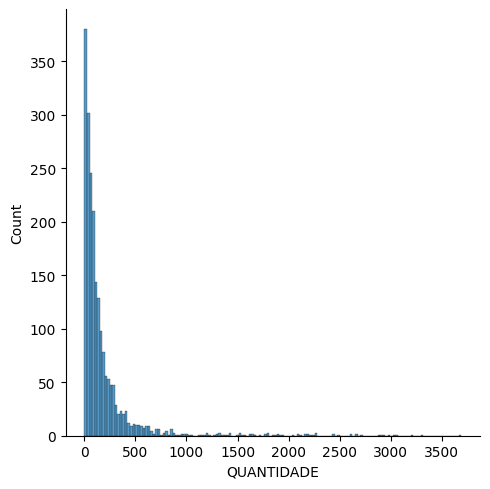

In [0]:
#Distribuição assimáetrica
sns.displot(df['QUANTIDADE'])

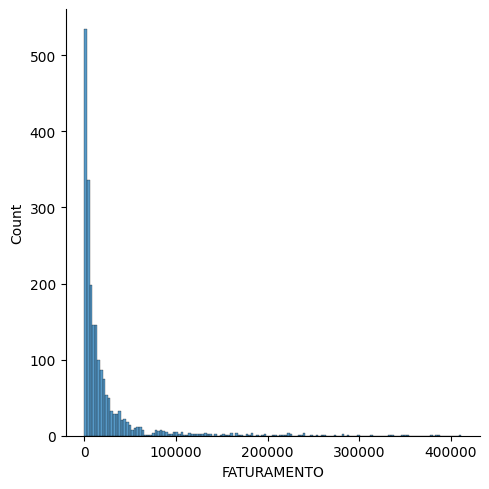

In [0]:
#Distribuição assimétrica
sns.displot(df['FATURAMENTO'])

In [0]:
df.columns

Index(['REFERENCIA', 'EMPRESA', 'FAMILIA', 'SKU', 'QUANTIDADE', 'FATURAMENTO'], dtype='object')

In [0]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [0]:
df['FAMILIA'].value_counts()

CreatFit          144
LifeFit           127
Omega Plus        126
Intestine         108
ExtraCreatine     105
ExtraPure         104
EnerMax            96
Vigor              83
BioActive          77
Climax             72
CoEnz              72
Complex            54
Triplo Mix         43
CalMin             42
Magnesium          40
PolyOmega          38
Oleo Herbal        36
Vita D             36
Activa             36
PureFlex           36
Maximum            36
Regenix            36
PalaFit            36
BioRib             36
MindFit            36
CicloFit           36
Óleo Plus          36
HairFit            36
Óleo Essencial     36
Óleo Vita          36
Oleo Natural       35
Super D            35
Óleo Azul          33
FlexMore           33
CoReboost          24
Levensa            24
J-Cold             18
BioSleep           18
YoungPlus          18
BladeFlex          15
Super S            12
BomSono             9
Name: FAMILIA, dtype: int64

In [0]:
df['EMPRESA'].value_counts()

B-Sales     730
MedClin     690
NutriMax    689
Name: EMPRESA, dtype: int64

In [0]:
df['REFERENCIA'].value_counts()

2024/10    201
2024/11    195
2024/12    194
2024/08    179
2024/09    179
2024/07    174
2024/05    170
2024/06    168
2024/03    166
2024/01    162
2024/02    161
2024/04    160
Name: REFERENCIA, dtype: int64

In [0]:
df['SKU'].value_counts()

LifeFit Tangerina 10g C/ 30 Saches    55
Activa D3® - 60 Cápsulas              36
LifeFit Limão 10g C/ 30 Saches        36
Vita D - 120 cápsulas                 36
CreatFit - Lata 100g                  36
                                      ..
BladeFlex - Extra                      4
BladeFlex  21x                         4
BladeFlex - Regenix                    3
Omega Plus - 120 softcaps              1
Omega Plus - 60 softcaps               1
Name: SKU, Length: 81, dtype: int64

<Axes: xlabel='EMPRESA', ylabel='QUANTIDADE'>

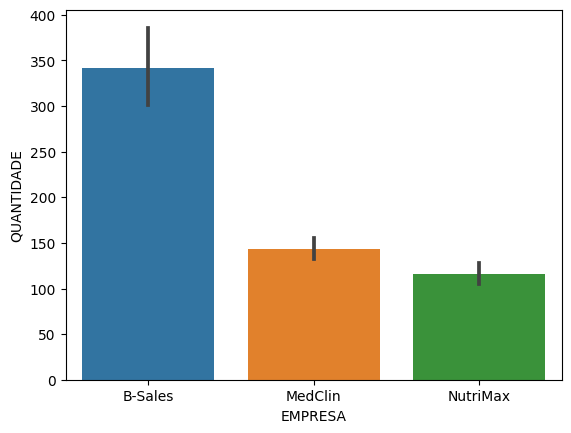

In [0]:
sns.barplot(x=df['EMPRESA'], y=df['QUANTIDADE'])

<Axes: xlabel='EMPRESA', ylabel='FATURAMENTO'>

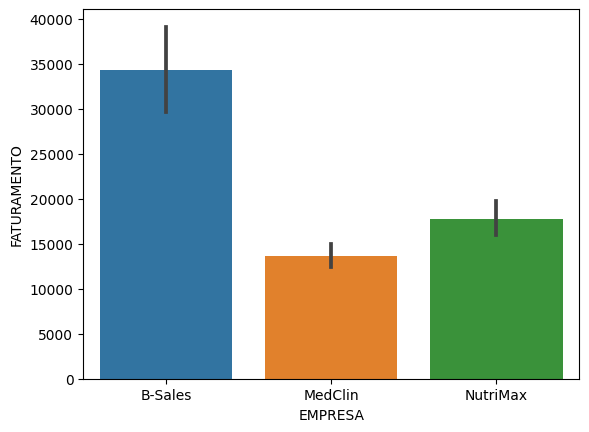

In [0]:
sns.barplot(x=df['EMPRESA'], y=df['FATURAMENTO'])

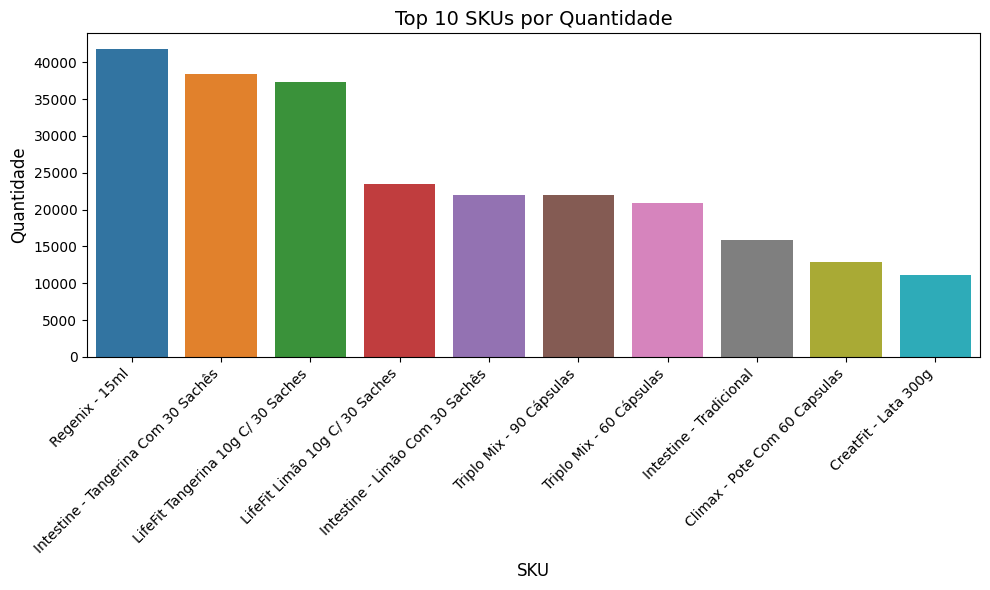

In [0]:
top_10_sku_quantidade = (
    df.groupby('SKU')
    .agg({'QUANTIDADE': 'sum'})
    .nlargest(10, 'QUANTIDADE')
    .reset_index()
)

pltb.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='SKU', y='QUANTIDADE', data=top_10_sku_quantidade)
pltb.xticks(rotation=45, ha='right')  # 'ha' ajusta o alinhamento horizontal dos rótulos
pltb.tick_params(axis='x', labelsize=10)
pltb.title('Top 10 SKUs por Quantidade', fontsize=14)
pltb.ylabel('Quantidade', fontsize=12)
pltb.xlabel('SKU', fontsize=12)
pltb.tight_layout()
pltb.show()
#Era esperado pois as FAMILIAS REGENIX, LIFEFIT e INTESTINE possui o maior faturamento entre as familias

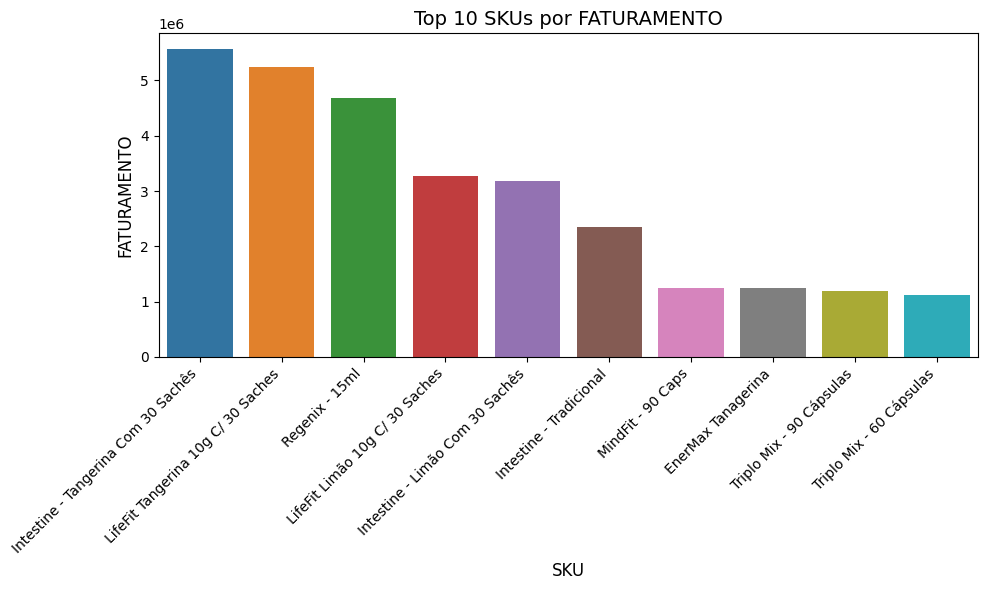

In [0]:
top_10_sku_faturamento = (
    df.groupby('SKU')
    .agg({'FATURAMENTO': 'sum'})
    .nlargest(10, 'FATURAMENTO')
    .reset_index()
)

pltb.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='SKU', y='FATURAMENTO', data=top_10_sku_faturamento)
pltb.xticks(rotation=45, ha='right')  # 'ha' ajusta o alinhamento horizontal dos rótulos
pltb.tick_params(axis='x', labelsize=10)
pltb.title('Top 10 SKUs por FATURAMENTO', fontsize=14)
pltb.ylabel('FATURAMENTO', fontsize=12)
pltb.xlabel('SKU', fontsize=12)
pltb.tight_layout()
pltb.show()
#Era esperado pois as FAMILIAS REGENIX, LIFEFIT, INTESTINE possui a maior quantidade entre as familias

In [0]:
df.columns

Index(['REFERENCIA', 'EMPRESA', 'FAMILIA', 'SKU', 'QUANTIDADE', 'FATURAMENTO'], dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REFERENCIA   2109 non-null   object 
 1   EMPRESA      2109 non-null   object 
 2   FAMILIA      2109 non-null   object 
 3   SKU          2109 non-null   object 
 4   QUANTIDADE   2109 non-null   int64  
 5   FATURAMENTO  2109 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 99.0+ KB


In [0]:
df['REFERENCIA'][0]

'2024/01'

In [0]:
#Cirando a coluna MES e ANO para Análise Exploratoria Temporal

In [0]:
df[['ANO', 'MES']] = df['REFERENCIA'].str.split('/', expand=True)

In [0]:
df['ANO'] = df['ANO'].astype(int)
df['MES'] = df['MES'].astype(int)

In [0]:
df['ANO'].unique()

array([2024])

In [0]:
df['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

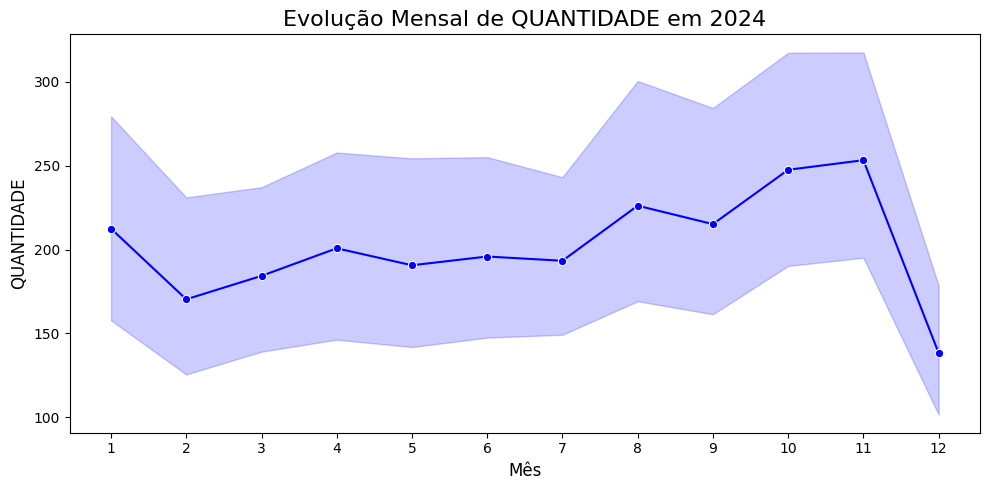

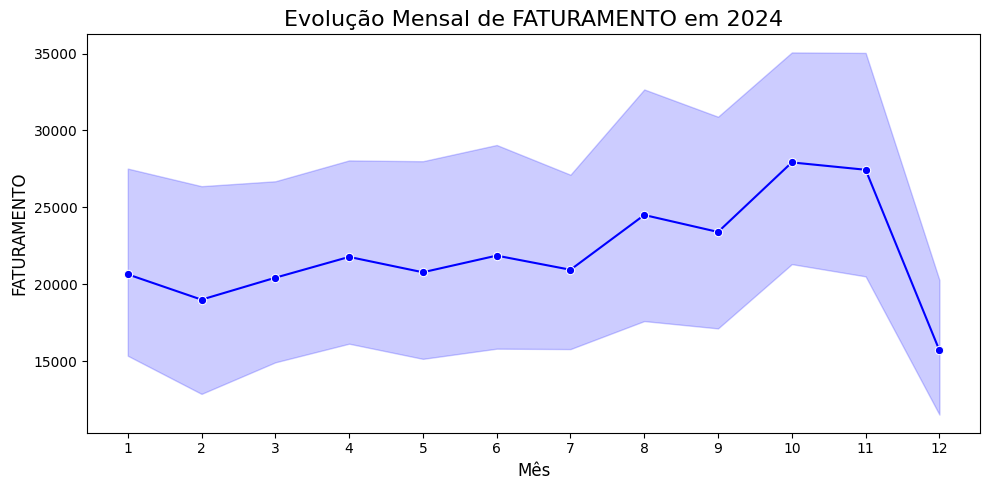

In [0]:
def plot_line_chart(data, value_column, title):
    pltb.figure(figsize=(10, 5))
    sns.lineplot(data=data, x='MES', y=value_column, marker='o', color='b')
    pltb.title(title, fontsize=16)
    pltb.xlabel('Mês', fontsize=12)
    pltb.ylabel(value_column, fontsize=12)
    pltb.xticks(range(1, 13))  # 1 e 12 Mês
    pltb.tight_layout()
    pltb.show()

data_2024 = df[df['ANO'] == 2024]
plot_line_chart(data_2024, 'QUANTIDADE', 'Evolução Mensal de QUANTIDADE em 2024')
plot_line_chart(data_2024, 'FATURAMENTO', 'Evolução Mensal de FATURAMENTO em 2024')

In [0]:
# Calculando a correlação
correlation = df[['QUANTIDADE', 'FATURAMENTO']].corr()
print("Correlação entre QUANTIDADE e FATURAMENTO:")
print(correlation)
#Diretamente proporcionais com imaginado


Correlação entre QUANTIDADE e FATURAMENTO:
             QUANTIDADE  FATURAMENTO
QUANTIDADE     1.000000     0.929652
FATURAMENTO    0.929652     1.000000


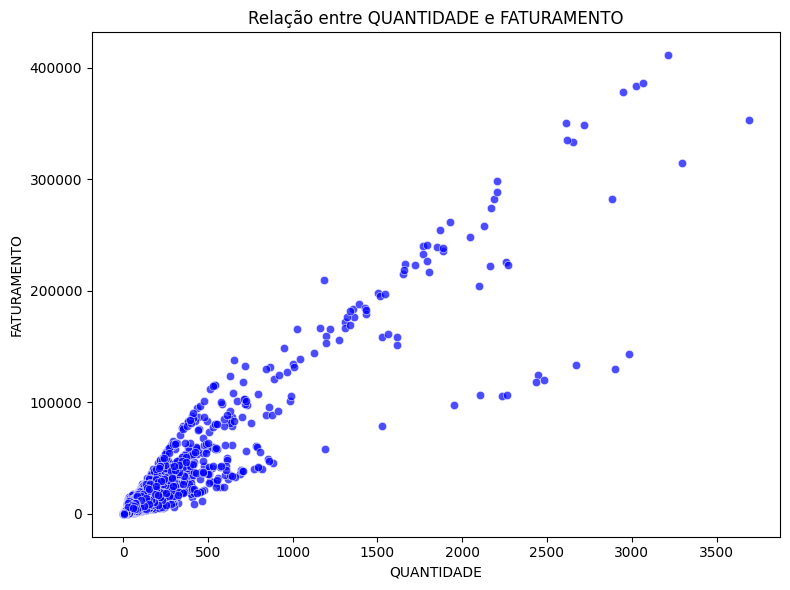

In [0]:
# Gráfico de dispersão
pltb.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='QUANTIDADE', y='FATURAMENTO', alpha=0.7, color='b')
pltb.title('Relação entre QUANTIDADE e FATURAMENTO')
pltb.xlabel('QUANTIDADE')
pltb.ylabel('FATURAMENTO')
pltb.tight_layout()
pltb.show()

#Relação linear positiva


In [0]:
# Métricas agregadas por EMPRESA
aggregated_empresa = df.groupby('EMPRESA')[['QUANTIDADE', 'FATURAMENTO']].agg(['mean', 'sum'])
aggregated_empresa_sorted = aggregated_empresa.sort_values(('FATURAMENTO', 'sum'), ascending=False)
print(aggregated_empresa_sorted)




          QUANTIDADE           FATURAMENTO             
                mean     sum          mean          sum
EMPRESA                                                
B-Sales   341.728767  249462  34371.707205  25091346.26
NutriMax  116.193033   80057  17753.029884  12231837.59
MedClin   143.424638   98963  13620.979710   9398476.00


In [0]:
#Por familia
aggregated_familia = df.groupby('FAMILIA')[['QUANTIDADE', 'FATURAMENTO']].agg(['mean', 'sum'])
aggregated_familia_sorted = aggregated_familia.sort_values(('FATURAMENTO', 'sum'), ascending=False)

print(aggregated_familia_sorted)

                 QUANTIDADE           FATURAMENTO             
                       mean    sum           mean          sum
FAMILIA                                                       
Intestine        707.657407  76427  102732.571111  11095117.68
LifeFit          525.370079  66722   74909.488425   9513505.03
Regenix         1162.388889  41846  130113.569722   4684088.51
EnerMax          172.979167  16606   25157.854167   2415154.00
Triplo Mix       995.558140  42809   53663.406047   2307526.46
CreatFit         139.027778  20020   12410.220903   1787071.81
ExtraCreatine    120.771429  12681   16660.508095   1749353.35
Climax           253.861111  18278   21950.229306   1580416.51
Omega Plus       109.238095  13764   10658.384206   1342956.41
MindFit          266.722222   9602   34868.788611   1255276.39
FlexMore         271.333333   8954   31878.913030   1052004.13
CoEnz            143.652778  10343   14114.156250   1016219.25
BioActive        113.129870   8711   11325.503506    87

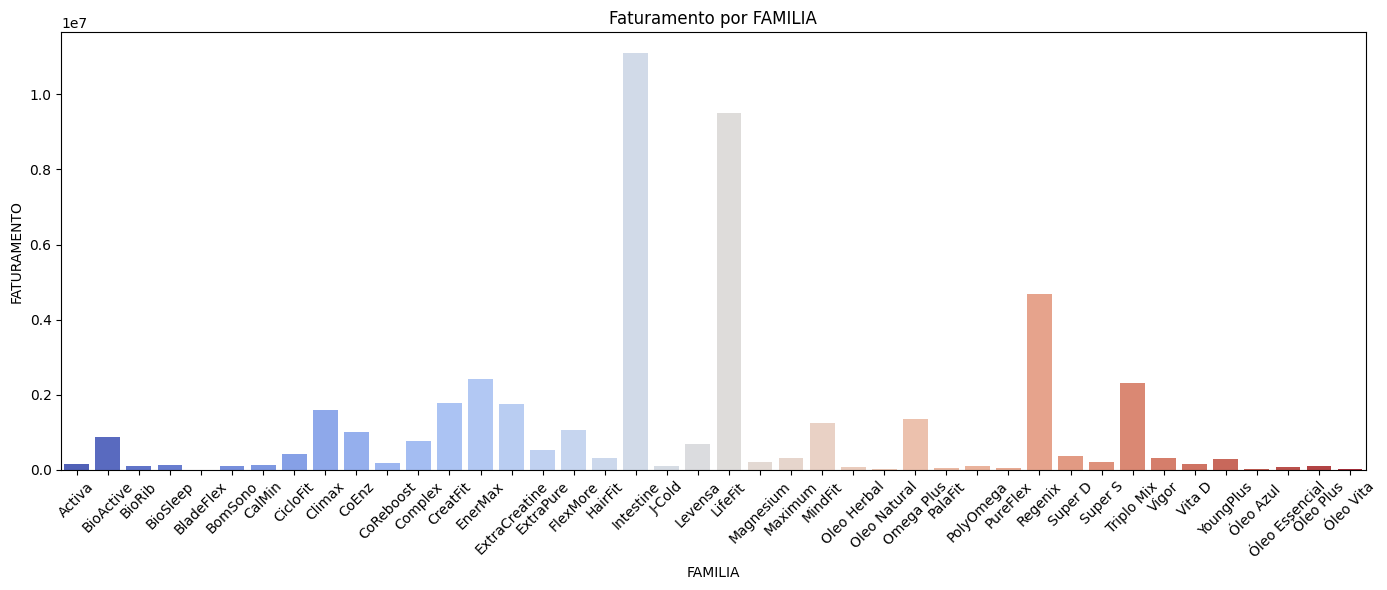

In [0]:
# Gráfico de barras para FAMILIA
familia_faturamento = df.groupby('FAMILIA')['FATURAMENTO'].sum().reset_index()
pltb.figure(figsize=(14, 6))
sns.barplot(data=familia_faturamento, x='FAMILIA', y='FATURAMENTO', palette='coolwarm')
pltb.title('Faturamento por FAMILIA')
pltb.xlabel('FAMILIA')
pltb.ylabel('FATURAMENTO')
pltb.xticks(rotation=45)
pltb.tight_layout()
pltb.show()

Participação relativa por EMPRESA:
EMPRESA
B-Sales     53.703885
MedClin     20.115886
NutriMax    26.180229
Name: FATURAMENTO, dtype: float64


Text(0.5, 1.0, 'Participação relativa por EMPRESA(%)')

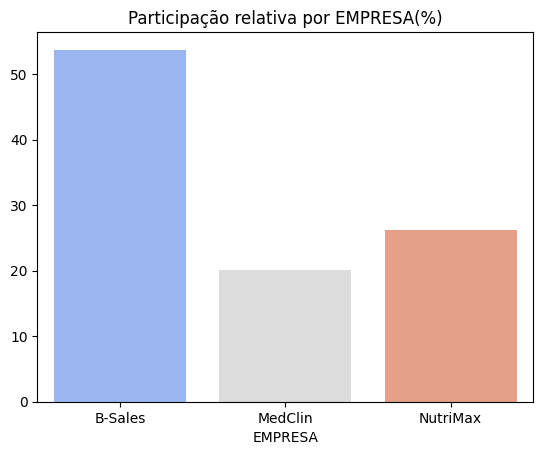

In [0]:
# Calculando participação relativas em % de cada EMPRESA
empresa_participacao = (df.groupby('EMPRESA')['FATURAMENTO'].sum() / df['FATURAMENTO'].sum()) * 100
print("Participação relativa por EMPRESA:")
print(empresa_participacao)
sns.barplot(x=empresa_participacao.index, y=empresa_participacao.values, palette='coolwarm')
pltb.title('Participação relativa por EMPRESA(%)')

Top 5 FAMÍLIAS com maior contribuição para o faturamento:
FAMILIA
Intestine     11095117.68
LifeFit        9513505.03
Regenix        4684088.51
EnerMax        2415154.00
Triplo Mix     2307526.46
Name: FATURAMENTO, dtype: float64


Text(0.5, 1.0, 'Participação relativa por FAMILIA')

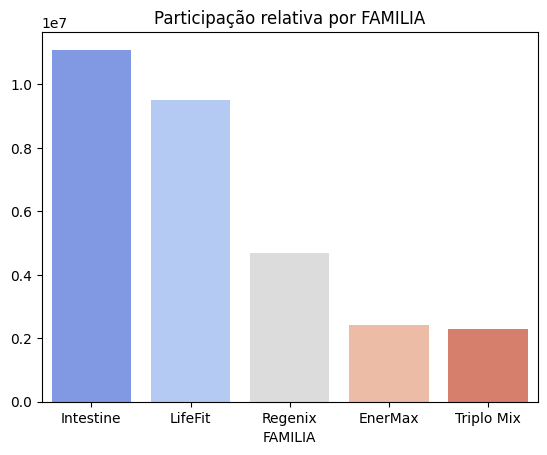

In [0]:
# Top famílias por faturamento
top_familias = df.groupby('FAMILIA')['FATURAMENTO'].sum().nlargest(5)
print("Top 5 FAMÍLIAS com maior contribuição para o faturamento:")
print(top_familias)
sns.barplot(x=top_familias.index, y=top_familias.values, palette='coolwarm')
pltb.title('Participação relativa por FAMILIA')

In [0]:
# Identificando SKUs com baixo faturamento em relação à quantidade (ANOMALIAS)
# Percebe-se que a familia BladeFlax figura entre os SKUs anomalos
low_faturamento_skus = df[df['FATURAMENTO'] / df['QUANTIDADE'] < 1]
print("SKUs com baixo faturamento:")
print(low_faturamento_skus[['SKU', 'QUANTIDADE', 'FATURAMENTO']])

SKUs com baixo faturamento:
                       SKU  QUANTIDADE  FATURAMENTO
84          BladeFlex  21x          10         0.10
343         BladeFlex  21x           5         0.05
643      BladeFlex - Extra           5         0.05
646   BladeFlex - FlexMore           6         0.06
970   BladeFlex - FlexMore           3         0.03
977      BladeFlex - Extra           8         0.08
982    BladeFlex - Regenix           2         0.02
1332        BladeFlex  21x           4         0.04
1333  BladeFlex - FlexMore           4         0.04
1334   BladeFlex - Regenix          14         0.14
1335     BladeFlex - Extra           2         0.02
1357   BladeFlex - Regenix          30         0.30
1717        BladeFlex  21x           2         0.02
1718     BladeFlex - Extra           2         0.02
1719  BladeFlex - FlexMore           2         0.02


_____________________________________________________________________________

3 - 

In [0]:
df.columns

Index(['REFERENCIA', 'EMPRESA', 'FAMILIA', 'SKU', 'QUANTIDADE', 'FATURAMENTO',
       'ANO', 'MES', 'participacao_FATURAMENTO'],
      dtype='object')

In [0]:
# Calculando o FATURAMENTO total
FATURAMENTO_total = df['FATURAMENTO'].sum()

# Calculando a % de participação de cada SKU
df['participacao_FATURAMENTO'] = (df['FATURAMENTO'] / FATURAMENTO_total) * 100

# Exibindo o resultado
teste = df[['participacao_FATURAMENTO', 'SKU']].sort_values('participacao_FATURAMENTO', ascending=False)
display(teste)

In [0]:
df.columns

Index(['REFERENCIA', 'EMPRESA', 'FAMILIA', 'SKU', 'QUANTIDADE', 'FATURAMENTO',
       'ANO', 'MES', 'participacao_FATURAMENTO'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REFERENCIA                2109 non-null   object        
 1   EMPRESA                   2109 non-null   object        
 2   FAMILIA                   2109 non-null   object        
 3   SKU                       2109 non-null   object        
 4   QUANTIDADE                2109 non-null   int64         
 5   FATURAMENTO               2109 non-null   float64       
 6   ANO                       2109 non-null   int64         
 7   MES                       2109 non-null   int64         
 8   participacao_FATURAMENTO  2109 non-null   float64       
 9   DATA                      2109 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 164.9+ KB


In [0]:
df = df.sort_values(['SKU', 'DATA'])

In [0]:
df['SKU'].nunique()

81

In [0]:
df.columns

Index(['Unnamed: 0', 'REFERENCIA', 'EMPRESA', 'FAMILIA', 'SKU', 'QUANTIDADE',
       'FATURAMENTO', 'month'],
      dtype='object')

In [0]:
import pandas as pd

def analise_faturamento(df):
   
    #Convertendo a coluna (REFERENCIA) para um formato date
    #Calculado o preço unitário dividindo o faturamento pela quantidade
    #Criado uma coluna de período mensal para agrupar os dados por mês
    df['REFERENCIA'] = pd.to_datetime(df['REFERENCIA'])
    df['PRECO_UNITARIO'] = df['FATURAMENTO'] / df['QUANTIDADE']
    df['PERIODO_MENSAL'] = df['REFERENCIA'].dt.to_period('M')
    
    # Calcular faturamento mensal por SKU
    #Agrupamos os dados por mês e por produto (SKU)
    #Somamos o faturamento para cada combinação de mês e produto
    faturamento_mensal = df.groupby(['PERIODO_MENSAL', 'SKU'])['FATURAMENTO'].sum().reset_index()

#Calcula o faturamento total de cada mês
#Faz um merge para ter o total mensal junto com os dados por produto
#Calcula a participação percentual de cada produto
#See um produto faturou R$100 em um mês onde o total foi R$1000, sua participação é 10%
    faturamento_total_mensal = faturamento_mensal.groupby('PERIODO_MENSAL')['FATURAMENTO'].sum().reset_index()
    faturamento_mensal = faturamento_mensal.merge(
        faturamento_total_mensal, 
        on='PERIODO_MENSAL', 
        suffixes=('', '_TOTAL')
    )
    faturamento_mensal['PARTICIPACAO'] = (
        faturamento_mensal['FATURAMENTO'] / faturamento_mensal['FATURAMENTO_TOTAL']
    )
    
    #Ordena os dados por SKU e período
    #Calcula uma média móvel de 3 meses da participação de cada produto
    faturamento_mensal = faturamento_mensal.sort_values(['SKU', 'PERIODO_MENSAL'])
    projecao = faturamento_mensal.groupby('SKU')['PARTICIPACAO'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )
    faturamento_mensal['PARTICIPACAO_PROJETADA'] = projecao
    
    # Obter última projeção por SKU
    ultima_projecao = (
        faturamento_mensal.sort_values('PERIODO_MENSAL')
        .groupby('SKU')
        .last()
        .reset_index()
    )
    
    # Adicionar preços unitários (usando a média dos últimos 3 meses)
    df_sorted = df.sort_values('REFERENCIA')
    precos_medios = df_sorted.groupby('SKU')['PRECO_UNITARIO'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )
    df_sorted['PRECO_MEDIO'] = precos_medios
    
    precos_recentes = (
        df_sorted.groupby('SKU')['PRECO_MEDIO']
        .last()
        .reset_index()
    )
    
    ultima_projecao = ultima_projecao.merge(
        precos_recentes, 
        on='SKU', 
        how='left'
    )
    
    # Defininds as metas de faturamento em um dic:
    metas_faturamento = {'Janeiro': 6325000, 'Fevereiro': 6565000}
    

    #O loop for mes, meta in metas_faturamento.items(): percorre cada mês e sua meta
    # Formular crua: quantidade = meta * participacao_projetada / preco_medio:
    
    #eXEMPLO
    #Participação projetada = 10% (0.10)
    #Preço médio = R$ 50,00
    #Meta de Janeiro = R$ 6.325.000

    #Quantidade = 6.325.000 * 0.10 / 50
    #Quantidade = 632.500 / 50
    #Quantidade = 12.650 unidades

    for mes, meta in metas_faturamento.items():
        ultima_projecao[f'QUANTIDADE_{mes}'] = (
            meta * ultima_projecao['PARTICIPACAO_PROJETADA'] / ultima_projecao['PRECO_MEDIO']
        )
    
    # Selecionar e renomear colunas para o resultado final
    colunas_resultado = [
        'SKU',
        'PARTICIPACAO_PROJETADA',
        'PRECO_MEDIO',
        'QUANTIDADE_Janeiro',
        'QUANTIDADE_Fevereiro'
    ]
    
    resultado_final = ultima_projecao[colunas_resultado].copy()
    
    return resultado_final


resultado = analise_faturamento(df)
print("\nResultado da análise:")
print(resultado)


Resultado da análise:
                                  SKU  ...  QUANTIDADE_Fevereiro
0            Activa D3® - 60 Cápsulas  ...            228.549433
1          BioActive - 100mg- 30 Caps  ...            247.634695
2                    BioActive - 15ml  ...           1044.666690
3          BioActive - 50mg - 60 Caps  ...            116.344815
4                      BioRib - 150 g  ...            166.595158
..                                ...  ...                   ...
76  YoungPlus - Tangerina - Lata 300g  ...            478.699225
77           Óleo Azul - 120 softcaps  ...             26.868604
78       Óleo Essencial - 60 softcaps  ...            124.974418
79           Óleo Plus - 120 softcaps  ...            149.037680
80           Óleo Vita - 120 softcaps  ...             77.026227

[81 rows x 5 columns]


In [0]:
display(resultado)

SKU,PARTICIPACAO_PROJETADA,PRECO_MEDIO,QUANTIDADE_Janeiro,QUANTIDADE_Fevereiro
Activa D3® - 60 Cápsulas,0.002555889924616222,73.4170159410482,220.19423652656286,228.5494328532625
BioActive - 100mg- 30 Caps,0.004429520349684486,117.43023773773774,238.58178908166207,247.63469491242867
BioActive - 15ml,0.016337148915904796,102.66756241690409,1006.4762857960312,1044.666690316355
BioActive - 50mg - 60 Caps,0.002032192493671933,114.67072061191628,112.09153874576126,116.34481452425655
BioRib - 150 g,0.0017443735386243203,68.74036687949733,160.50485519142035,166.5951579971027
BioSleep -30ml,0.0040307590974627055,63.40128306549857,402.11412228225277,417.37220755462283
BladeFlex 21x,9.14165731273834E-9,0.01,5.782098250307,6.00149802581272
BladeFlex - Extra,9.966570629858928E-9,0.01,6.303855923385772,6.543053618502387
BladeFlex - FlexMore,6.949517517749452E-9,0.01,4.3955698299765285,4.562358250402515
BladeFlex - Regenix,3.6323433270325353E-8,0.01,22.97457154348079,23.846333941968595


In [0]:
#display(faturamento_mensal)